# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt
import joblib

# Reading and preprocessing of dataset

In [2]:
num_cols = ['ASHOKLEY','CANBK','LICI','ONGC','SBIN']
today_date = date.today().strftime("%Y-%m-%d")

In [3]:
dataset = pd.read_csv(f"D:\\Projects\\Jupyter_Lab\\Stock_market_predictor\\stock_prices_dataset\\Stocks_train_{today_date}.csv")

In [5]:
# Pivot with stock column
dataset_train = dataset.pivot(index='Date',columns='Stock',values='Close').reset_index()

Stock,Date,ASHOKLEY,CANBK,LICI,ONGC,SBIN
0,2022-06-01,140.00,208.65,810.55,149.70,468.20
1,2022-06-02,143.45,213.50,805.85,152.50,469.75
2,2022-06-03,139.60,211.10,800.25,151.55,464.30
3,2022-06-06,138.35,210.30,777.40,154.00,463.55
4,2022-06-07,139.60,209.10,752.90,161.85,463.35
...,...,...,...,...,...,...
732,2025-05-26,239.85,107.45,870.00,245.80,794.35
733,2025-05-27,239.55,108.44,871.05,244.55,793.80
734,2025-05-28,238.50,110.88,942.55,242.70,796.45
735,2025-05-29,240.65,110.81,944.40,243.35,797.30


In [6]:
# Feature Scaling
sc = MinMaxScaler(feature_range=(0,1))
train_data = sc.fit_transform(dataset_train[num_cols])

In [8]:
# Creating a data structure with 60 time steps and 1 output
X_train = []
y_train = []
for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,:])
    y_train.append(train_data[i,:])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
# Saving min max scaler file
joblib.dump(sc,'D:\\Projects\\Jupyter_Lab\\Stock_market_predictor\\Stock_predictor_BSE_2025\\model_files\\min_max_scaler.joblib')

['D:\\Projects\\Jupyter_Lab\\Stock_market_predictor\\Stock_predictor_BSE_2025\\model_files\\min_max_scaler.joblib']

# Training of GRU model

In [34]:
regressor = Sequential()

regressor.add(GRU(units=200,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
regressor.add(Dropout(0.05))

"""regressor.add(GRU(units=118,activation='relu', return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(GRU(units=118,activation='relu', return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(GRU(units=150,activation='relu', return_sequences=True))
regressor.add(Dropout(0.2))"""

regressor.add(GRU(units=200,activation='relu'))
regressor.add(Dropout(0.05))

regressor.add(Dense(units=X_train.shape[2]))

regressor.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [36]:
history = regressor.fit(X_train,y_train,epochs=50, batch_size=100,validation_split=0.2)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 541ms/step - accuracy: 0.0800 - loss: 0.1909 - val_accuracy: 0.7794 - val_loss: 0.0871
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - accuracy: 0.1007 - loss: 0.0453 - val_accuracy: 0.7794 - val_loss: 0.0340
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - accuracy: 0.4717 - loss: 0.0212 - val_accuracy: 0.2206 - val_loss: 0.0230
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 377ms/step - accuracy: 0.7815 - loss: 0.0174 - val_accuracy: 0.5368 - val_loss: 0.0122
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 456ms/step - accuracy: 0.8204 - loss: 0.0087 - val_accuracy: 0.7794 - val_loss: 0.0143
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 443ms/step - accuracy: 0.8616 - loss: 0.0080 - val_accuracy: 0.2206 - val_loss: 0.0097
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step - accuracy: 0.8327 - loss: 0.0068 - val_accuracy: 0.2206 - val_loss: 0.0075
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 450ms/step - accuracy: 0.8450 - loss: 0.0055 - val_accuracy: 0.7794 - val_loss:

# Plotting loss and accuracy curves

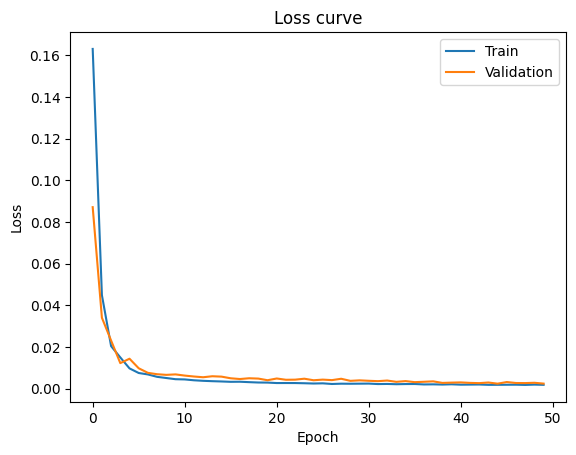

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.savefig(f"D:\\Projects\\Jupyter_Lab\\Stock_market_predictor\\loss_curves\\loss_curve_{today_date}.png")

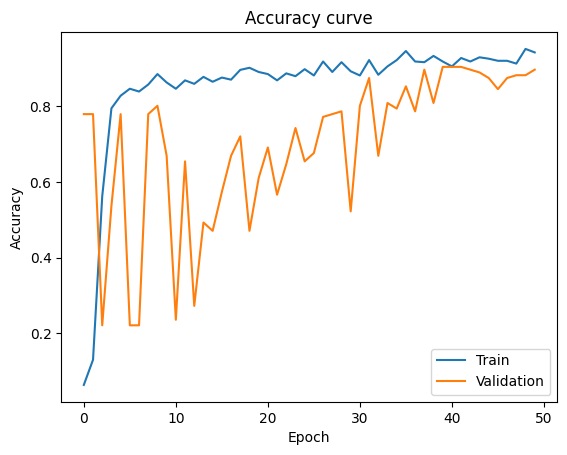

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.savefig(f"D:\\Projects\\Jupyter_Lab\\Stock_market_predictor\\accuracy_curves\\accuracy_curve_{today_date}.png")

# Saving the model

In [39]:
regressor.save('D:\\Projects\\Jupyter_Lab\\Stock_market_predictor\\Stock_predictor_BSE_2025\\model_files\\stock_predictor.keras')